1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,LeaveOneOut,KFold,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [22]:
df = pd.read_csv('SalaryData_Train(1).csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df_test = pd.read_csv('SalaryData_Test(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [26]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [27]:
print('No. of duplicated rows in Training data',df.duplicated().sum(),'\n \n No. of NA values \n',df.isna().sum().sum())
print('No. of duplicated rows in Testing data',df_test.duplicated().sum(),'\n \n No. of NA values \n',df_test.isna().sum().sum())

No. of duplicated rows in Training data 3258 
 
 No. of NA values 
 0
No. of duplicated rows in Testing data 930 
 
 No. of NA values 
 0


In [28]:
#Removing the duplicated rows\
print('No. of Duplicated Rows before dropping',df.duplicated().sum(),'\n Size of Dataframe ', df.shape)
df = df.drop_duplicates().reset_index(drop=True)
print('No. of Duplicated Rows after dropping duplicate',df.duplicated().sum(),'\n Size of Dataframe ', df.shape)

print('No. of Duplicated Rows before dropping',df_test.duplicated().sum(),'\n Size of Dataframe ', df_test.shape)
df_test = df_test.drop_duplicates().reset_index(drop=True)
print('No. of Duplicated Rows after dropping duplicate',df_test.duplicated().sum(),'\n Size of Dataframe ', df_test.shape)

No. of Duplicated Rows before dropping 3258 
 Size of Dataframe  (30161, 14)
No. of Duplicated Rows after dropping duplicate 0 
 Size of Dataframe  (26903, 14)
No. of Duplicated Rows before dropping 930 
 Size of Dataframe  (15060, 14)
No. of Duplicated Rows after dropping duplicate 0 
 Size of Dataframe  (14130, 14)


In [29]:
(df == 0).sum()

age                  0
workclass            0
education            0
educationno          0
maritalstatus        0
occupation           0
relationship         0
race                 0
sex                  0
capitalgain      24379
capitalloss      25485
hoursperweek         0
native               0
Salary               0
dtype: int64

In [31]:
(df_test == 0).sum()

age                  0
workclass            0
education            0
educationno          0
maritalstatus        0
occupation           0
relationship         0
race                 0
sex                  0
capitalgain      12881
capitalloss      13420
hoursperweek         0
native               0
Salary               0
dtype: int64

In [34]:
label_encoder = LabelEncoder()
df['workclass_label']= label_encoder.fit_transform(df['workclass']) 
df['education_label']= label_encoder.fit_transform(df['education']) 
df['maritalstatus_label']= label_encoder.fit_transform(df['maritalstatus']) 
df['occupation_label']= label_encoder.fit_transform(df['occupation']) 
df['relationship_label']= label_encoder.fit_transform(df['relationship']) 
df['race_label']= label_encoder.fit_transform(df['race']) 
df['sex_label']= label_encoder.fit_transform(df['sex']) 
df['native_label']= label_encoder.fit_transform(df['native']) 
df['Salary_label']= label_encoder.fit_transform(df['Salary']) 
df.head()
df_test['workclass_label']= label_encoder.fit_transform(df_test['workclass']) 
df_test['education_label']= label_encoder.fit_transform(df_test['education']) 
df_test['maritalstatus_label']= label_encoder.fit_transform(df_test['maritalstatus']) 
df_test['occupation_label']= label_encoder.fit_transform(df_test['occupation']) 
df_test['relationship_label']= label_encoder.fit_transform(df_test['relationship']) 
df_test['race_label']= label_encoder.fit_transform(df_test['race']) 
df_test['sex_label']= label_encoder.fit_transform(df_test['sex']) 
df_test['native_label']= label_encoder.fit_transform(df_test['native']) 
df_test['Salary_label']= label_encoder.fit_transform(df_test['Salary']) 
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,Salary,workclass_label,education_label,maritalstatus_label,occupation_label,relationship_label,race_label,sex_label,native_label,Salary_label
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,<=50K,2,1,4,6,3,2,1,37,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,<=50K,2,11,2,4,0,4,1,37,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,>50K,1,7,2,10,0,4,1,37,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,>50K,2,15,2,6,0,2,1,37,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,...,<=50K,2,0,4,7,1,4,1,37,0


In [33]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'workclass_label',
       'education_label', 'maritalstatus_label', 'occupation_label',
       'relationship_label', 'race_label', 'sex_label', 'native_label',
       'Salary_label'],
      dtype='object')

In [36]:
df1=df.iloc[:,[0,3,9,10,11]]
df2 = df.iloc[:,14:]
df_new = pd.concat([df1,df2],axis=1,join='inner')
df_new.head()

df_test1=df_test.iloc[:,[0,3,9,10,11]]
df_test2 = df_test.iloc[:,14:]
df_test_new = pd.concat([df_test1,df_test2],axis=1,join='inner')
df_test_new.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_label,education_label,maritalstatus_label,occupation_label,relationship_label,race_label,sex_label,native_label,Salary_label
0,25,7,0,0,40,2,1,4,6,3,2,1,37,0
1,38,9,0,0,50,2,11,2,4,0,4,1,37,0
2,28,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,10,7688,0,40,2,15,2,6,0,2,1,37,1
4,34,6,0,0,30,2,0,4,7,1,4,1,37,0


In [38]:
#Feature Selection Model Validation
x = df_new.iloc[:,:-1]
y= df_new.iloc[:,-1:]
model =DecisionTreeClassifier(criterion='entropy')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model.fit(x,y)
rfe = RFE(model)
rfe.fit(x,y)
print("Decession Tree Feature selection \n",model.feature_importances_)
print("Recursive Feature Selection Ranking ", rfe.ranking_,"\n Recursive Feature Selection Top Features ",rfe.support_)

Decession Tree Feature selection 
 [0.19767199 0.09749138 0.1354143  0.0431261  0.10653599 0.05144074
 0.02054201 0.01504918 0.0750278  0.20814059 0.02101122 0.00615878
 0.02238991]
Recursive Feature Selection Ranking  [1 1 1 3 1 2 6 7 1 1 5 8 4] 
 Recursive Feature Selection Top Features  [ True  True  True False  True False False False  True  True False False
 False]


In [39]:
pd.DataFrame([x.columns,rfe.ranking_,model.feature_importances_]).T

,0,1,2
0,age,1,0.197672
1,educationno,1,0.0974914
2,capitalgain,1,0.135414
3,capitalloss,3,0.0431261
4,hoursperweek,1,0.106536
5,workclass_label,2,0.0514407
6,education_label,6,0.020542
7,maritalstatus_label,7,0.0150492
8,occupation_label,1,0.0750278
9,relationship_label,1,0.208141


In [40]:
df1 = df_new.iloc[:,[0,1,2,4,5,8,9]]# we are not considering area because from that column only size_category is derived i.e based on areasize size category is classified
df2 = y
new_df = pd.concat([df1,df2],axis=1,join='inner')
new_df.head()

,age,educationno,capitalgain,hoursperweek,workclass_label,occupation_label,relationship_label,Salary_label
0,39,13,2174,40,5,0,1,0
1,50,13,0,13,4,3,0,0
2,38,9,0,40,2,5,1,0
3,53,7,0,40,2,5,0,0
4,28,13,0,40,2,9,5,0


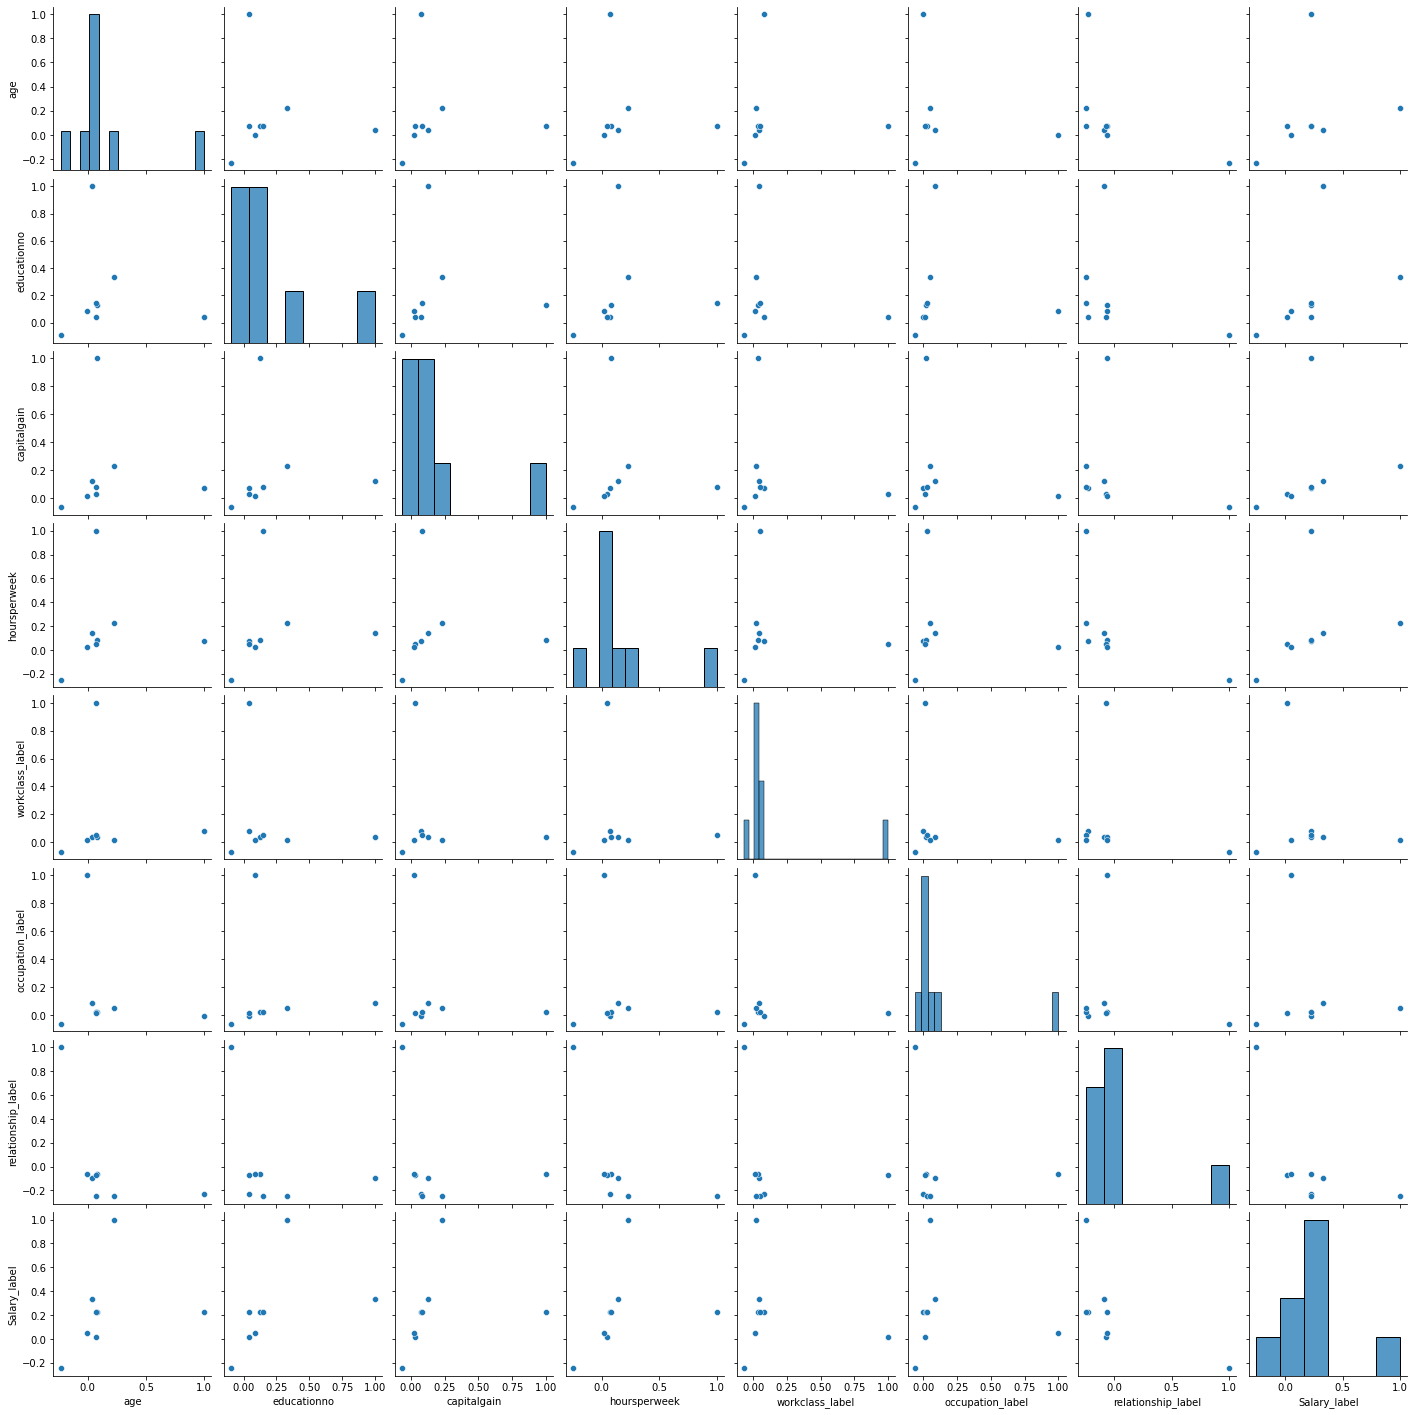

In [41]:
#Data exploration and visualizaion
cor = new_df.corr()
sns.pairplot(cor)

No. of numerical columns 8 



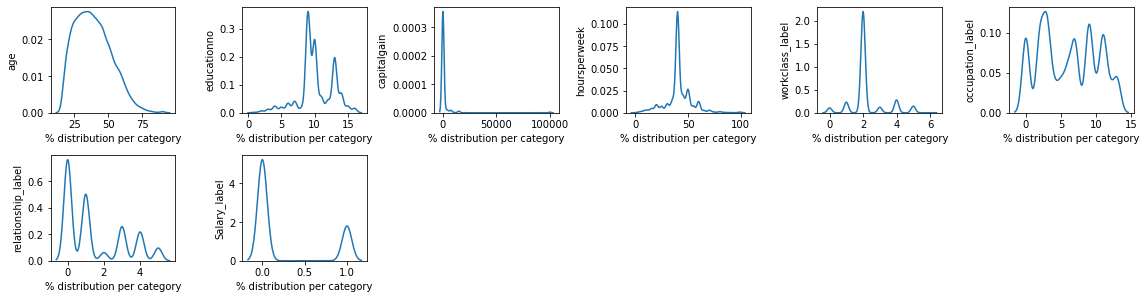

,age,educationno,capitalgain,hoursperweek,workclass_label,occupation_label,relationship_label,Salary_label
skewness,0.51477,-0.348516,11.276812,0.34338,1.052882,0.070096,0.810911,1.119850
kurtosis,-0.15948,0.554951,137.717522,2.91949,1.889036,-1.250931,-0.743207,-0.745991


In [45]:
num_columns = new_df.select_dtypes(exclude='object').columns.tolist()#numerical colum
print('No. of numerical columns',len(num_columns),'\n')
plt.figure(figsize=(16,10))
for i,col in enumerate(num_columns,1):
    plt.subplot(5,6,i)
    sns.kdeplot(df_new[col])
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()
num_data = new_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [42]:
X=new_df.iloc[:,:-1]
Y=new_df.iloc[:,-1:]
#As the datafile is already categorized the variable 
#Transforming the data to rescaling the data using log 
#removing the scaling effect 
scalar = ss()
scaled_value = scalar.fit_transform(X.values)
scaled_df = pd.DataFrame(scaled_value)
scaled_df.head()

,0,1,2,3,4,5,6
0,-0.003726,1.089919,0.122810,-0.094323,2.791383,-1.503368,-0.277736
1,0.830329,1.089919,-0.155722,-2.281121,1.788156,-0.758349,-0.895505
2,-0.079549,-0.436737,-0.155722,-0.094323,-0.218299,-0.261669,-0.277736
3,1.057799,-1.200065,-0.155722,-0.094323,-0.218299,-0.261669,-0.895505
4,-0.837781,1.089919,-0.155722,-0.094323,-0.218299,0.731690,2.193341


In [43]:
## Grid Search for Algorithm Tuning
import warnings
warnings.filterwarnings('ignore')
x=scaled_df.values
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]# kernel can be polynomial/rbf(radial base func/linear)
param_grid
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid,refit=True,verbose=3)
grid.fit(x, Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=15, gamma=50, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=15, gamma=50, kernel=rbf, score=0.747, total= 3.2min
[CV] C=15, gamma=50, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] .......... C=15, gamma=50, kernel=rbf, score=0.747, total= 3.2min
[CV] C=15, gamma=50, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV] .......... C=15, gamma=50, kernel=rbf, score=0.745, total= 3.2min
[CV] C=15, gamma=50, kernel=rbf ......................................
[CV] .......... C=15, gamma=50, kernel=rbf, score=0.744, total= 3.1min
[CV] C=15, gamma=50, kernel=rbf ......................................
[CV] .......... C=15, gamma=50, kernel=rbf, score=0.748, total= 3.1min
[CV] C=15, gamma=5, kernel=rbf .......................................
[CV] ........... C=15, gamma=5, kernel=rbf, score=0.780, total= 1.8min
[CV] C=15, gamma=5, kernel=rbf .......................................
[CV] ........... C=15, gamma=5, kernel=rbf, score=0.783, total= 1.9min
[CV] C=15, gamma=5, kernel=rbf .......................................
[CV] ........... C=15, gamma=5, kernel=rbf, score=0.780, total= 1.9min
[CV] C=15, gamma=5, kernel=rbf .......................................
[CV] ........... C=15, gamma=5, kernel=rbf, score=0.784, total= 1.8min
[CV] C=15, gamma=5, kernel=rbf .......................................
[CV] .

[CV] .......... C=12, gamma=50, kernel=rbf, score=0.747, total= 1.4min
[CV] C=12, gamma=50, kernel=rbf ......................................
[CV] .......... C=12, gamma=50, kernel=rbf, score=0.748, total= 1.4min
[CV] C=12, gamma=50, kernel=rbf ......................................
[CV] .......... C=12, gamma=50, kernel=rbf, score=0.745, total= 1.4min
[CV] C=12, gamma=50, kernel=rbf ......................................
[CV] .......... C=12, gamma=50, kernel=rbf, score=0.745, total= 2.0min
[CV] C=12, gamma=50, kernel=rbf ......................................
[CV] .......... C=12, gamma=50, kernel=rbf, score=0.748, total= 3.2min
[CV] C=12, gamma=5, kernel=rbf .......................................
[CV] ........... C=12, gamma=5, kernel=rbf, score=0.782, total= 1.8min
[CV] C=12, gamma=5, kernel=rbf .......................................
[CV] ........... C=12, gamma=5, kernel=rbf, score=0.784, total= 1.8min
[CV] C=12, gamma=5, kernel=rbf .......................................
[CV] .

[CV] ......... C=10, gamma=0.5, kernel=rbf, score=0.837, total=  35.3s
[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.5, kernel=rbf, score=0.841, total=  34.5s
[CV] C=0.1, gamma=50, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=50, kernel=rbf, score=0.744, total= 2.2min
[CV] C=0.1, gamma=50, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=50, kernel=rbf, score=0.744, total= 2.2min
[CV] C=0.1, gamma=50, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=50, kernel=rbf, score=0.744, total= 2.0min
[CV] C=0.1, gamma=50, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=50, kernel=rbf, score=0.744, total= 2.0min
[CV] C=0.1, gamma=50, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=50, kernel=rbf, score=0.744, total= 2.2min
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 478.0min finished


0.8369700080622374
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [44]:
#loocv = LeaveOneOut()# we use this method for model validation technique as the data record count is small
#considering test data
#{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
#df_test_new
model_building = SVC(C= 10, gamma = 0.5)
model_building.fit(x , Y)
results = cross_val_score(model_building, x, Y, cv=10)
results.mean()

0.837824498293223

In [45]:
df_test_new.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_label,education_label,maritalstatus_label,occupation_label,relationship_label,race_label,sex_label,native_label,Salary_label
0,25,7,0,0,40,2,1,4,6,3,2,1,37,0
1,38,9,0,0,50,2,11,2,4,0,4,1,37,0
2,28,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,10,7688,0,40,2,15,2,6,0,2,1,37,1
4,34,6,0,0,30,2,0,4,7,1,4,1,37,0


In [70]:
print("Mean---",results.mean(),"\n Std Deviation----",results.std())
X_test = df_test_new.iloc[:,[0,1,2,4,5,8,9]]
Y_test = df_test_new.iloc[:,-1].values
scaled_Testvalue = scalar.fit_transform(X_test)
y_pred = model_building.predict(scaled_Testvalue)
print(classification_report(Y_test,y_pred))
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Mean--- 0.837824498293223 
 Std Deviation---- 0.00713131588637392
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10620
           1       0.71      0.59      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.79      0.76      0.77     14130
weighted avg       0.83      0.84      0.83     14130

Accuracy = 83.76503892427459


array([[9753,  867],
       [1427, 2083]], dtype=int64)

In [75]:
pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
14125,0,0
14126,0,0
14127,0,1
14128,0,0


In [77]:
passedTest = df_test_new.iloc[np.where(y_pred==Y_test)]
print("Total Test length is ",len(X_test),"\n Passed Test count is ",len(passedTest))
failed = df_test_new.iloc[np.where(y_pred!=Y_test)]
print("\n"," Failed Test count is",len(failed))

Total Test length is  14130 
 Passed Test count is  11836

  Failed Test count is 2294
